In [1]:
# -*- coding: utf8

from gb import GrangerBusca

import numpy as np

In [5]:
timestamps = []
with open('ticks.dat') as data:
    for l in data:
        timestamps.append([float(x) for x in l.split()[1:]])

granger_model = GrangerBusca(alpha_prior=1.0/len(timestamps), num_iter=300)
granger_model.fit(timestamps)

{0: 120699, 1: 119701, 2: 119706, 3: 119700, 4: 121052, 5: 121076, 6: 121335, 7: 119700}
{0: array([ 0, 26, 40, 12, 42], dtype=uint64), 1: array([36,  2, 21, 30,  8, 50, 53, 51, 58, 57, 64, 55], dtype=uint64), 2: array([34, 33, 25, 22, 31, 49, 46, 48, 56], dtype=uint64), 3: array([29, 19,  7, 16, 17, 47, 44, 54, 10, 52, 59, 66, 60, 63],
      dtype=uint64), 4: array([35, 41, 28,  5,  4, 32], dtype=uint64), 5: array([ 6, 38, 20, 24, 39,  1], dtype=uint64), 6: array([14,  3, 13, 37, 15, 23], dtype=uint64), 7: array([ 9, 43, 27, 18, 11, 45, 68, 67, 61, 65, 62], dtype=uint64)}


In [6]:
granger_model.mu_

array([7.29893208e-03, 4.88563977e-04, 9.37153871e-04, 4.56183926e-04,
       7.02265554e-04, 4.27448395e-04, 4.86235354e-04, 2.43485029e-03,
       5.33733010e-04, 8.40264269e-04, 0.00000000e+00, 8.60281466e-04,
       2.58525263e-04, 4.58120637e-04, 4.85165115e-04, 5.24633093e-04,
       7.04985973e-04, 4.54222683e-04, 4.16275396e-04, 4.40209597e-04,
       4.71069567e-04, 1.49358528e-03, 4.34151346e-04, 4.25194056e-04,
       2.56845186e-04, 3.65408722e-04, 7.03398363e-04, 4.63157486e-04,
       2.86266852e-04, 5.34910373e-04, 3.87225737e-04, 3.79859661e-04,
       4.43151846e-04, 4.60445249e-04, 4.97098886e-04, 4.96513191e-04,
       5.02489471e-04, 3.71502851e-04, 6.18993529e-04, 3.99190844e-04,
       4.57706978e-04, 2.28709808e-04, 2.97086640e-04, 4.48883067e-04,
       0.00000000e+00, 5.48953808e-05, 3.43990017e-05, 0.00000000e+00,
       0.00000000e+00, 1.15113231e-04, 7.35482681e-05, 0.00000000e+00,
       0.00000000e+00, 4.41666851e-05, 8.31182155e-06, 0.00000000e+00,
      

In [7]:
granger_model.Alpha_

<69x69 sparse matrix of type '<class 'numpy.uint64'>'
	with 268 stored elements in Compressed Sparse Row format>

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors

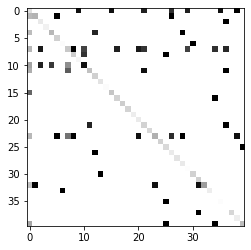

In [9]:
plt.imshow(granger_model.Alpha_.toarray()[:40, :40],
           norm=colors.LogNorm(), cmap=plt.cm.gray)

In [10]:
granger_model.Alpha_.toarray()

array([[14123,     0,     0, ...,     0,     0,     0],
       [ 2879,  2185,     0, ...,     0,     0,     0],
       [    0,     0, 22185, ...,     0,     0,     0],
       ...,
       [  922,    99,    21, ...,     0,     0,     0],
       [  240,     0,     0, ...,     0,     0,     0],
       [  332,     0,     6, ...,     0,     0,     0]], dtype=uint64)

In [11]:
X = granger_model.Alpha_.toarray()
X = (X / X.sum(axis=1)).T

In [19]:
X

array([[ 0.34793169,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02985745,  0.07643956,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05307397,  0.        ,  0.6426856 , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.06666667,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.18446602]])

In [35]:
from scipy import sparse as sp

def save_sparse_csr(filename, granger_model):
    state = {}
    for key, val in granger_model.curr_state_.items():
        state['id_{}'.format(key)] = np.array(val)
        
    np.savez_compressed(filename,
                        Alpha_data=granger_model.Alpha_.data,
                        Alpha_indices=granger_model.Alpha_.indices,
                        Alpha_indptr=granger_model.Alpha_.indptr,
                        Alpha_shape=granger_model.Alpha_.shape,
                        alpha_p=granger_model.alpha_p,
                        back_=granger_model.back_,
                        beta_=granger_model.beta_,
                        burn_in=granger_model.burn_in,
                        mu_=granger_model.mu_,
                        num_iter=granger_model.num_iter,
                        **state,
                       )

def load_model(filename):
    model = GrangerBusca(0, 0, 0)
    loader = np.load(filename)
    model.Alpha_ = sp.csr_matrix((loader['Alpha_data'],
                                  loader['Alpha_indices'],
                                  loader['Alpha_indptr']),
                                  shape=loader['Alpha_shape'])
    model.alpha_p = loader['alpha_p'][0]
    model.back_ = loader['back_']
    model.beta_ = loader['beta_']
    model.burn_in = loader['burn_in'][0]
    model.mu_ = loader['mu_']
    model.num_iter = loader['num_iter'][0]
    state = {}
    for id_ in range(model.mu_.shape[0]):
        state[id_] = loader['id_{}'.format(id_)]
    model.curr_state_ = state
    return model

In [32]:
save_sparse_csr('first_model-tests.npz', granger_model)

In [36]:
new_model = load_model('first_model-tests.npz')

In [37]:
new_model

In [38]:
granger_model

In [42]:
(new_model.Alpha_ != granger_model.Alpha_).toarray().any()

False

In [43]:
(new_model.back_ != granger_model.back_).any()

False

In [44]:
(new_model.beta_ != granger_model.beta_).any()

False

In [45]:
(new_model.mu_ != granger_model.mu_).any()

False

In [46]:
new_model.burn_in

array(200)

In [47]:
new_model.num_iter

array(300)

In [48]:
new_model.alpha_p

array(0.014492753623188406)

In [49]:
new_model.curr_state_

{0: array([64, 64, -1, ...,  0,  0,  0]),
 1: array([64, -1, -1, ..., 53,  4,  4]),
 2: array([64, 64, -1, ...,  2,  2,  2]),
 3: array([64, 64, 64, ...,  3,  3,  3]),
 4: array([64, -1, -1, ...,  0,  4,  4]),
 5: array([64, 64, 64, ..., 39, 37,  5]),
 6: array([64, 64, 64, ...,  6,  6,  6]),
 7: array([64, -1, -1, ...,  0,  4,  0]),
 8: array([64, 64, 64, ...,  8,  8,  8]),
 9: array([64, 64, 64, ...,  7,  9,  9]),
 10: array([64, 64, 32, 21, 21, 21,  8,  8, 21, 32,  8, 21,  8,  8,  8, 21, 47,
         8, 21,  8, 32,  8, 32,  8, 21,  8, 21, 32,  8, 21,  8, 21, 21,  8,
         8,  8,  8, 32,  8,  8]),
 11: array([64, -1, -1, ..., 11, 21, 11]),
 12: array([64, 64, 64, ...,  0, 12, 12]),
 13: array([64, 64, 64, ..., 13, 13, 13]),
 14: array([64, 64, 64, ..., 14, 14, 14]),
 15: array([64, -1, 15, ..., 21, 32, 15]),
 16: array([64, 64, 64, ..., 16,  0, 16]),
 17: array([64, -1, 31, ...,  7,  4, 17]),
 18: array([64, 64, -1, ..., 18, 18, 18]),
 19: array([64, 64, 64, ..., 32, 19, 19]),
 20

In [50]:
granger_model.curr_state_

{0: [64,
  64,
  -1,
  0,
  -1,
  -1,
  -1,
  64,
  -1,
  7,
  -1,
  7,
  4,
  42,
  42,
  42,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  32,
  0,
  0,
  0,
  42,
  0,
  0,
  42,
  0,
  42,
  7,
  7,
  7,
  0,
  4,
  0,
  7,
  7,
  0,
  7,
  0,
  0,
  0,
  0,
  42,
  0,
  4,
  8,
  7,
  0,
  7,
  7,
  16,
  7,
  7,
  7,
  7,
  7,
  0,
  0,
  0,
  0,
  7,
  7,
  0,
  0,
  8,
  0,
  0,
  0,
  42,
  42,
  23,
  8,
  42,
  0,
  4,
  7,
  42,
  16,
  0,
  7,
  32,
  7,
  0,
  0,
  7,
  8,
  0,
  0,
  7,
  32,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  16,
  32,
  42,
  0,
  0,
  0,
  0,
  0,
  42,
  0,
  0,
  42,
  16,
  42,
  4,
  0,
  32,
  0,
  0,
  0,
  0,
  0,
  42,
  42,
  4,
  7,
  7,
  7,
  7,
  7,
  7,
  4,
  7,
  0,
  0,
  7,
  7,
  7,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  7,
  21,
  0,
  0,
  7,
  0,
  4,
  7,
  7,
  4,
  7,
  7,
  7,
  0,
  7,
  0,
  4,
  7,
  0,
  21,
  7,
  0,
  0,
  0,
  7,
  42,
  0,
  0,
  0,
  42,
  0,
  0,
  0,
  7,
  0,
  7,
  